In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gs
import numpy as np

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
print("Dataframe")
print(train.head(2))
print("----------------------------------------------------")
print("Info")
print(train.info())
print(test.info())
print("----------------------------------------------------")
print("Label Count")
print(train["target"].value_counts())

Dataframe
   id  target      0      1      2  ...      295    296    297    298    299
0   0     1.0 -0.098  2.165  0.681  ...   -2.097  1.051 -0.414  1.038 -1.065
1   1     0.0  1.081 -0.973 -0.383  ...   -1.624 -0.458 -1.099 -0.936  0.973

[2 rows x 302 columns]
----------------------------------------------------
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 589.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19750 entries, 0 to 19749
Columns: 301 entries, id to 299
dtypes: float64(300), int64(1)
memory usage: 45.4 MB
None
----------------------------------------------------
Label Count
1.0    160
0.0     90
Name: target, dtype: int64


In [4]:
print("----------------------------------------------------")
print("Missing Data")
print(train.isnull().any().any())

----------------------------------------------------
Missing Data
False


In [5]:
train_details = train.describe()
test_details = test.describe()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Mean for Testing/ Training set')

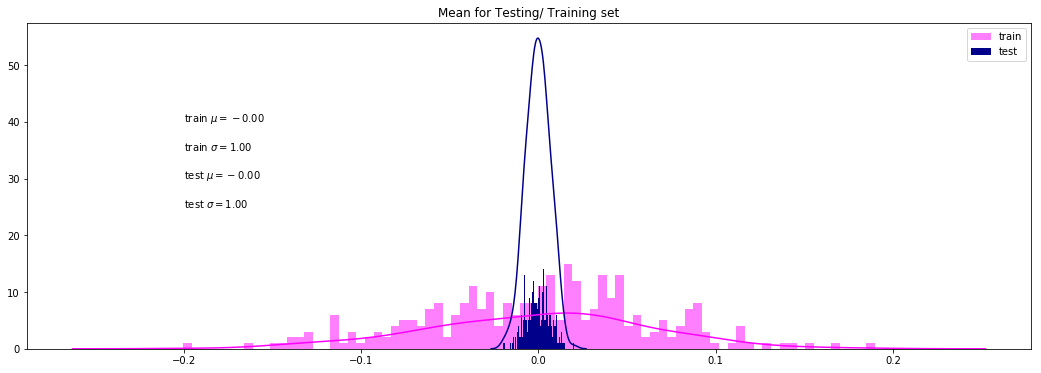

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train.iloc[:,2:]))
test_scaled = pd.DataFrame(scaler.transform(test.iloc[:,1:]))
train_scaled_details = train_scaled.describe()
test_scaled_details = test_scaled.describe()



fig = plt.figure(figsize=(18,6))
g = gs.GridSpec(1,1,fig)
ax = fig.add_subplot(g[0,0])




ax.hist(train_details.loc["mean","0":], alpha = 0.5,color="magenta", bins=80, label='train')
ax.hist(test_details.loc["mean","0":],color="darkblue",bins=80, label='test')
ax.text(-0.2, 40, r"train $\mu={0:3.2f}$".format(train_details.loc["mean","0":].mean()))
ax.text(-0.2, 35, r"train $\sigma={0:3.2f}$".format(train_details.loc["std","0":].mean()))
ax.text(-0.2, 30, r"test $\mu={0:3.2f}$".format(test_details.loc["mean","0":].mean()))
ax.text(-0.2, 25, r"test $\sigma={0:3.2f}$".format(test_details.loc["std","0":].mean()))

ax.legend(loc=0)
sns.kdeplot(train_details.loc["mean","0":],color="magenta" , ax=ax, legend =False)
sns.kdeplot(test_details.loc["mean","0":],color="darkblue" , ax=ax, legend =False)
ax.set_title("Mean for Testing/ Training set")

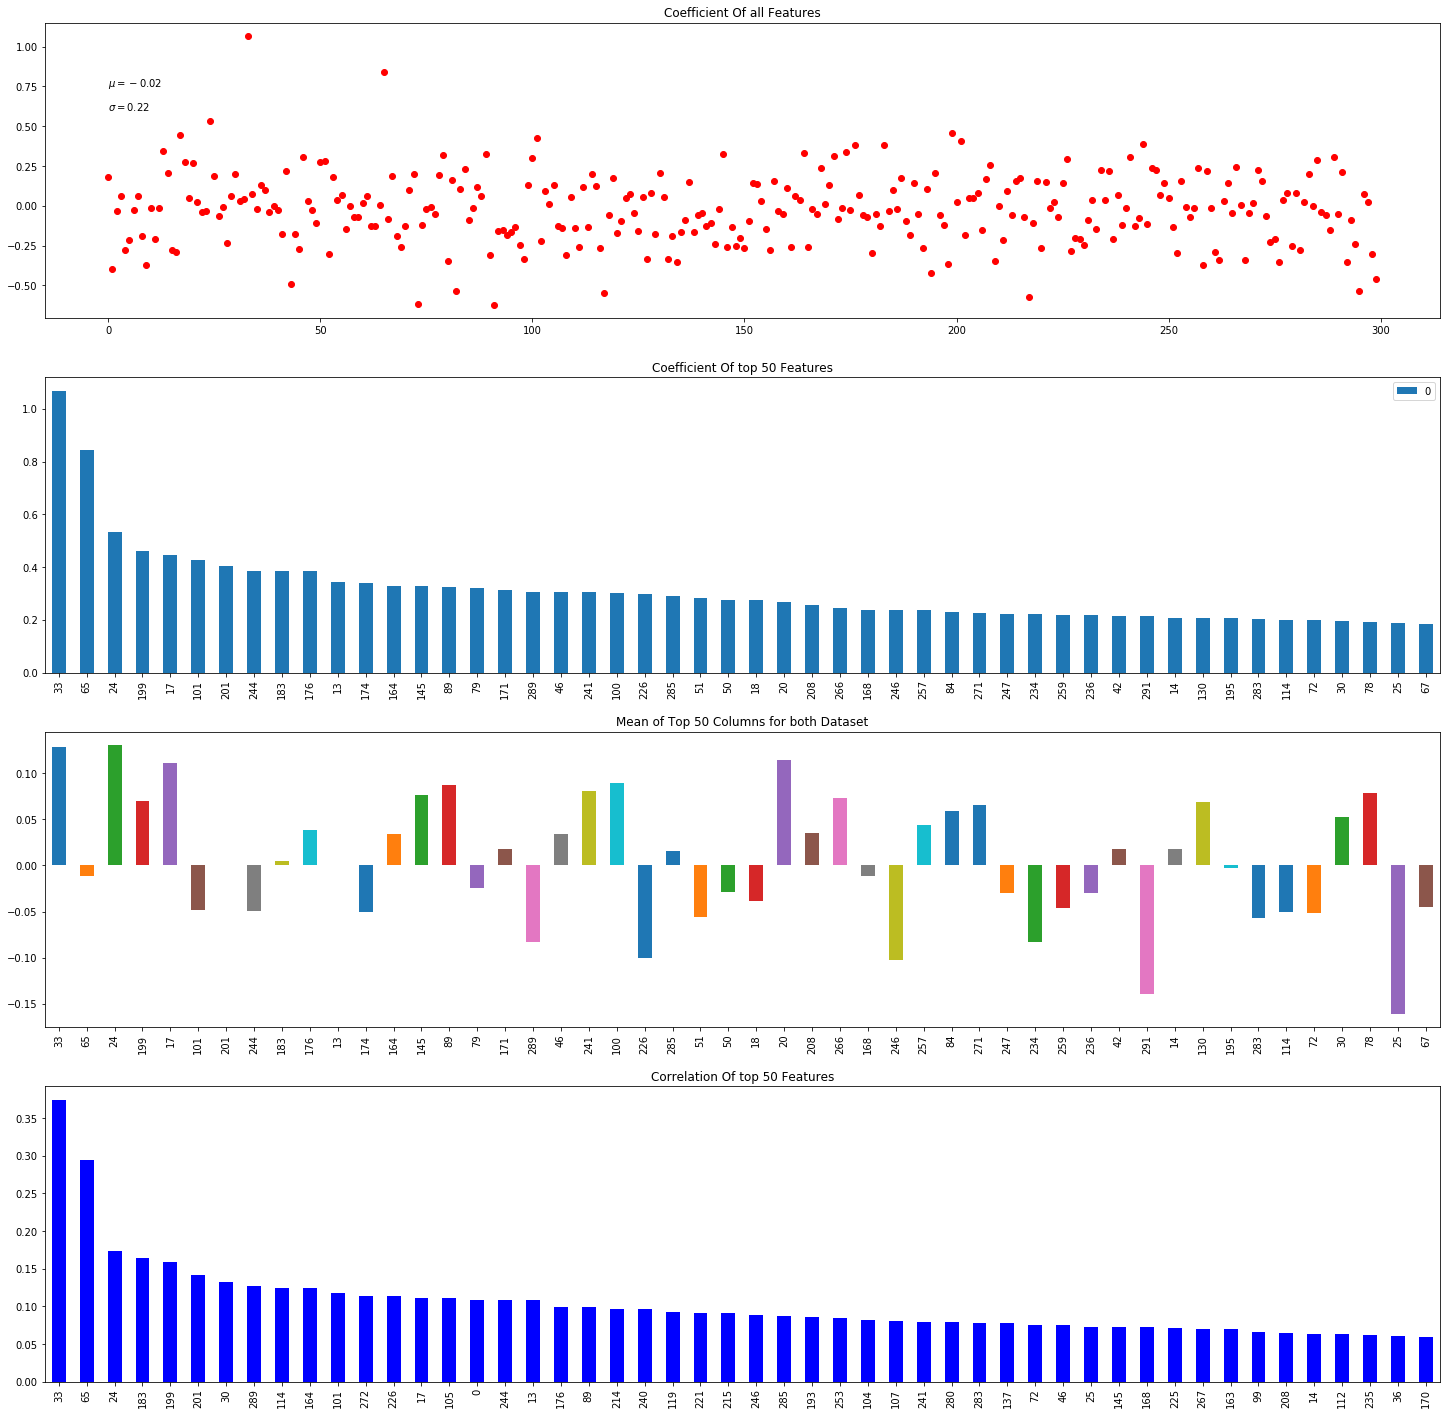

In [7]:
from sklearn.linear_model import LogisticRegression

data =pd.concat([ test_scaled , train_scaled.iloc[:,:]])

lr = LogisticRegression(solver='liblinear')

lr.fit(train_scaled.iloc[:,:], train.iloc[:,1])
coeff = pd.DataFrame(lr.coef_)
mean = coeff.T.mean()
std = coeff.T.std()
coeff_50 = coeff.T.sort_values(by=0,ascending = False).iloc[:50,:]
col = coeff_50.index 
data = data[col]
data = data.describe()

df_corr = train_scaled.iloc[:,:].apply(lambda x: x.corr(train.iloc[:,1]))
df_corr = df_corr.reset_index().sort_values(by=0,ascending = False).iloc[:50,:]





fig = plt.figure(figsize=(25,25))
g = gs.GridSpec(4,1,fig)
ax = fig.add_subplot(g[0,0])
ax2 = fig.add_subplot(g[1,0])
ax3 = fig.add_subplot(g[2,0])
ax4 = fig.add_subplot(g[3,0])

ax.set_title("Coefficient Of all Features")
ax.plot(coeff.T,'ro' )
ax.text(0, 0.75, r"$\mu={0:3.2f}$".format(mean[0]))
ax.text(0, 0.60, r"$\sigma={0:3.2f}$".format(std[0]))

ax2.set_title("Coefficient Of top 50 Features")
coeff_50.plot.bar(ax=ax2)

ax3.set_title("Mean of Top 50 Columns for both Dataset")
data.loc["mean",:].plot.bar(ax=ax3)

ax4.set_title("Correlation Of top 50 Features")
df_corr.iloc[:,1].plot.bar(ax=ax4,color ="Blue")


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


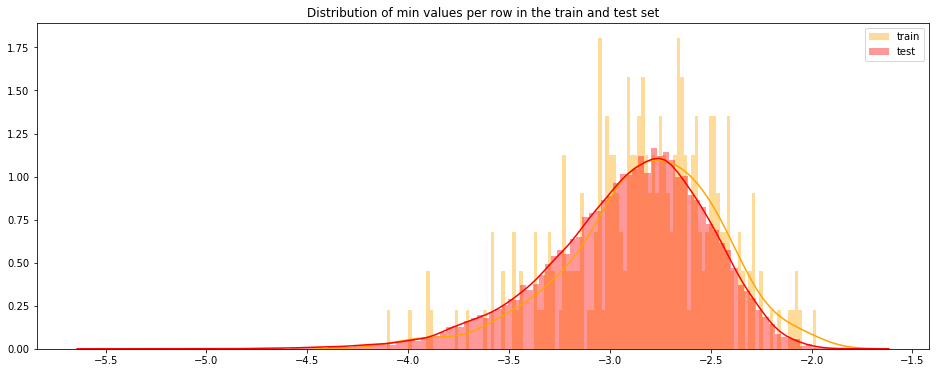

In [8]:
plt.figure(figsize=(16,6))

plt.title("Distribution of min values per row in the train and test set")
sns.distplot(train_scaled.min(axis=1),color="orange", kde=True,bins=120, label='train')
sns.distplot(test_scaled.min(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [9]:
train_scaled.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.121736,2.176002,0.503692,-0.609972,1.265232,-0.469388,-0.266814,0.210682,-2.296917,1.758518,-0.837523,-0.210066,0.272146,0.100863,0.910638,0.478662,0.156057,-0.560123,-0.571650,1.809886,0.520223,-1.927449,0.085863,-0.953670,1.900699,1.299597,-1.136879,-0.788281,-0.151376,-1.841191,1.162883,1.036164,-2.340273,0.512526,-0.869308,1.619400,-0.149435,-0.900281,-0.333978,0.048855,...,-0.691782,1.238030,-0.538300,-1.463646,-0.936591,0.058363,-0.642604,2.568056,0.779873,-0.484001,0.645908,-1.328472,-1.567094,-2.191939,-1.193751,0.148253,0.783155,-1.100944,-1.102307,0.466601,0.567860,1.097227,1.233008,0.454958,-0.877602,-0.872722,-1.730588,-0.347058,-0.487479,0.506632,0.814697,1.257605,0.509875,-0.664341,0.699064,-1.921131,1.040182,-0.421724,1.022411,-0.965720
1,1.061577,-0.939278,-0.539790,0.320974,-0.415729,0.340017,1.134681,0.291718,0.042547,-0.320787,2.689063,0.942527,2.027019,1.507559,0.648998,1.229186,1.055821,-0.128760,-0.566349,0.309631,-0.988012,-0.471992,1.383376,-0.512996,-1.397695,0.466177,-0.203612,0.897900,-0.428839,1.138565,-0.177127,0.289049,-0.404021,-2.552011,1.402890,0.132376,-0.125146,1.788258,0.462093,-0.260915,...,0.972249,-1.269516,0.531066,0.860701,-0.127273,-1.414522,0.968584,0.009228,-0.656197,1.206386,-1.627656,-2.855884,-0.592264,1.390643,0.362625,0.922293,2.021946,0.320253,1.187284,1.916355,-0.000182,-0.365362,-0.168913,1.080641,1.173032,0.224734,1.624629,0.029678,1.199384,-0.710163,-0.207701,-1.876475,-1.339295,1.430147,-0.703385,-1.464704,-0.522377,-1.108796,-0.939658,1.136883
2,-0.548290,-0.061678,-0.505465,0.144689,-0.022827,0.431232,-0.054798,-0.267006,0.180835,0.144993,0.428502,0.355594,-0.424460,0.345421,1.201470,0.356021,-1.036790,0.372848,-1.138863,0.177730,-1.545360,-0.981884,0.624128,-0.785239,1.923814,-0.018813,-0.179534,-1.371708,2.262551,0.000350,-1.966120,-0.438884,0.057185,1.044330,-0.704383,-0.048534,-0.965735,1.958394,-0.088507,1.974862,...,-0.549755,-0.180075,1.062331,-0.870860,1.024712,-0.777465,-0.872484,0.544774,1.388664,-0.514343,-1.561564,-0.704243,0.248040,0.839317,-0.620858,-1.126520,-0.240541,-0.792744,-0.297036,2.412573,-1.076888,-0.042843,-0.084175,1.336187,0.330687,-0.259059,1.272643,2.030743,0.727062,0.128508,-0.031358,0.140793,-1.302542,0.769883,1.430611,-1.021786,-1.646923,-0.002459,0.785850,-1.116348


In [10]:
def scores(X ,y, model):
    score = []
    score2 = []
    results = cross_val_score(model, X, y, cv = 3, scoring = 'roc_auc')
    results2 = cross_val_score(model, X, y, cv = 3, scoring = 'accuracy')
    score.append(results)
    score2.append(results2)
    score_df = pd.DataFrame(score).T
    score_df.loc['mean'] = score_df.mean()
    score_df.loc['std'] = score_df.std()
    score_df= score_df.rename(columns={0:'roc_auc'})
    print(score_df.iloc[-2:,:])
    score_df2 = pd.DataFrame(score2).T
    score_df2.loc['mean'] = score_df2.mean()
    score_df2.loc['std'] = score_df2.std()
    score_df2= score_df2.rename(columns={0:'acc'})
    print(score_df2.iloc[-2:,:])

In [11]:
from sklearn.model_selection import GridSearchCV ,cross_val_score
clf = LogisticRegression(max_iter=4000)


param_grid = [
  {'class_weight' : ['balanced', None],'penalty': ['l1'], 'solver': ['liblinear', 'saga'],'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
  {'class_weight' : ['balanced', None],'penalty': ['l2'], 'solver': ['newton-cg','lbfgs'],'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
 {'class_weight' : ['balanced', None],'penalty': ['l2','l1'], 'solver': ['saga'],'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
 ]

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, scoring='roc_auc')
grid_search.fit(train_scaled, train.iloc[:,1])
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8020833333333335
Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


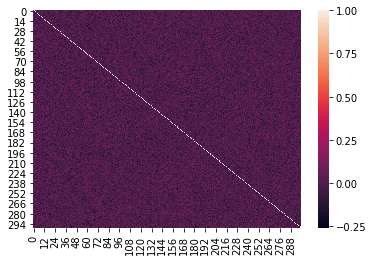

In [12]:
train_scaled_corr = train_scaled.corr()
sns.heatmap(train_scaled_corr)

In [13]:
model = LogisticRegression(C=0.1,random_state=42,class_weight='balanced',penalty='l1',solver='liblinear')
from sklearn.feature_selection import RFE

rfr_grid =  [5,10,15,25, 50, 75, 100, 125, 150, 175, 200 ,225,250,275,300]

for feature_num in rfr_grid :
    selector = RFE(model, feature_num, step=1)
    selector = selector.fit(train_scaled, train.iloc[:,1])
    new_features =  selector.transform(train_scaled)
    print("Number of Features {}".format(feature_num))
    scores(train_scaled,train.iloc[:,1],selector)

Number of Features 5
       roc_auc
mean  0.773138
std   0.025468
           acc
mean  0.704007
std   0.005051
Number of Features 10
       roc_auc
mean  0.789087
std   0.027304
           acc
mean  0.707975
std   0.024995
Number of Features 15
      roc_auc
mean  0.79736
std   0.01110
           acc
mean  0.691958
std   0.012292
Number of Features 25
       roc_auc
mean  0.807019
std   0.025237
           acc
mean  0.712039
std   0.008416
Number of Features 50
       roc_auc
mean  0.807019
std   0.025237
           acc
mean  0.712039
std   0.008416
Number of Features 75
       roc_auc
mean  0.807019
std   0.025237
           acc
mean  0.712039
std   0.008416
Number of Features 100
       roc_auc
mean  0.807019
std   0.025237
           acc
mean  0.712039
std   0.008416
Number of Features 125
       roc_auc
mean  0.807019
std   0.025237
           acc
mean  0.712039
std   0.008416
Number of Features 150
       roc_auc
mean  0.807019
std   0.025237
           acc
mean  0.712039
std   0.

In [14]:
selector = RFE(model,25, step=1)
selector = selector.fit(train_scaled, train.iloc[:,1])
train_scaled_selected_ =  selector.transform(train_scaled)
bool_mask = pd.Series(selector.support_,name='bools') 
scores(train_scaled,train.iloc[:,1],selector)
col = []
for num, i  in enumerate(bool_mask):
    if i ==True :
        col.append(num)

train_scaled_selected = train_scaled[col]
test_scaled_selected = test_scaled[col]
print("The columns that were used were {}".format(col))

       roc_auc
mean  0.807019
std   0.025237
           acc
mean  0.712039
std   0.008416
The columns that were used were [16, 33, 43, 63, 65, 73, 80, 82, 90, 91, 101, 108, 117, 127, 133, 134, 165, 189, 194, 199, 217, 226, 258, 295, 298]


In [15]:
train_scaled_selected["sum"] = train_scaled_selected.sum(axis=1)
train_scaled_selected["min"] = train_scaled_selected.min(axis=1)
train_scaled_selected["max"] = train_scaled_selected.max(axis=1)
train_scaled_selected["mean"] = train_scaled_selected.mean(axis=1)
train_scaled_selected["std"] = train_scaled_selected.std(axis=1)
train_scaled_selected["skew"] = train_scaled_selected.skew(axis=1)
train_scaled_selected["var"] = train_scaled_selected["std"]**2

train_scaled_selected["target"] = train_scaled_selected.iloc[:,1]



test_scaled_selected["sum"] = test_scaled_selected.sum(axis=1)
test_scaled_selected["min"] = test_scaled_selected.min(axis=1)
test_scaled_selected["max"] = test_scaled_selected.max(axis=1)
test_scaled_selected["mean"] = test_scaled_selected.mean(axis=1)
test_scaled_selected["std"] = test_scaled_selected.std(axis=1)
test_scaled_selected["skew"] = test_scaled_selected.skew(axis=1)
test_scaled_selected["var"] = test_scaled_selected["std"]**2


train_scaled_selected_true = train_scaled_selected[train_scaled_selected["target"] == 1]
train_scaled_selected_false = train_scaled_selected[train_scaled_selected["target"] == 0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p